In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = "/content/drive/"

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
import warnings
warnings.simplefilter("ignore", UserWarning)

In [ ]:
dataset = pd.read_csv(path+'/MyDrive/student-mat.csv')
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
dataset_features = list(zip(
# признаки
[i for i in dataset.columns],
zip(
    # типы колонок
    [str(i) for i in dataset.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in dataset.isnull().sum()],
    [i for i in dataset.nunique()]
)))
# Признаки с типом данных и количеством пропусков
dataset_features

[('school', ('object', 0, 2)),
 ('sex', ('object', 0, 2)),
 ('age', ('int64', 0, 8)),
 ('address', ('object', 0, 2)),
 ('famsize', ('object', 0, 2)),
 ('Pstatus', ('object', 0, 2)),
 ('Medu', ('int64', 0, 5)),
 ('Fedu', ('int64', 0, 5)),
 ('Mjob', ('object', 0, 5)),
 ('Fjob', ('object', 0, 5)),
 ('reason', ('object', 0, 4)),
 ('guardian', ('object', 0, 3)),
 ('traveltime', ('int64', 0, 4)),
 ('studytime', ('int64', 0, 4)),
 ('failures', ('int64', 0, 4)),
 ('schoolsup', ('object', 0, 2)),
 ('famsup', ('object', 0, 2)),
 ('paid', ('object', 0, 2)),
 ('activities', ('object', 0, 2)),
 ('nursery', ('object', 0, 2)),
 ('higher', ('object', 0, 2)),
 ('internet', ('object', 0, 2)),
 ('romantic', ('object', 0, 2)),
 ('famrel', ('int64', 0, 5)),
 ('freetime', ('int64', 0, 5)),
 ('goout', ('int64', 0, 5)),
 ('Dalc', ('int64', 0, 5)),
 ('Walc', ('int64', 0, 5)),
 ('health', ('int64', 0, 5)),
 ('absences', ('int64', 0, 34)),
 ('G1', ('int64', 0, 17)),
 ('G2', ('int64', 0, 17)),
 ('G3', ('int64', 0

In [ ]:
filtered_columns = ['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']
data = dataset[filtered_columns]
# Нужно ли масштабирование
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
# DataFrame не содержащий целевой признак
X_ALL = data.drop('G3', axis=1)

In [ ]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [ ]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['G3'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((316, 15), (79, 15))

# Масштабирование данных на основе Z-оценки:

In [ ]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,1.023046,1.143856,1.360371,0.792251,-0.042286,-0.449944,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-1.782467,-1.254791
1,0.238380,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-1.782467,-1.520979
2,-1.330954,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,-1.179147,-0.722415
3,-1.330954,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.234133,0.874715
4,-0.546287,0.229234,0.440257,-0.643249,-0.042286,-0.449944,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,-1.480807,-0.190038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2.592380,-0.685387,-0.479857,-0.643249,-0.042286,2.242901,1.178860,1.768808,0.801479,2.831553,2.105989,0.320890,0.661975,-0.575827,-0.456226
391,0.238380,0.229234,-1.399970,0.792251,-1.235351,-0.449944,-2.171138,0.766399,1.700867,1.707469,1.328545,-1.119469,-0.338906,0.932473,1.407091
392,3.377047,-1.600009,-1.399970,-0.643249,-1.235351,3.589323,1.178860,1.768808,-0.097908,1.707469,0.551100,-0.399289,-0.338906,-0.274167,-0.722415
393,1.023046,0.229234,-0.479857,2.227751,-1.235351,-0.449944,0.062194,0.766399,-1.896683,1.707469,1.328545,1.041070,-0.714236,0.027493,0.342338


In [ ]:
data_cs11_scaled.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
count,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02
mean,1.411529e-15,8.432074e-18,-1.264811e-16,-2.203582e-16,-2.709506e-16,-2.599889e-16,-1.410967e-16,1.028713e-16,-2.062345e-17,8.769357e-17,-3.091760e-17,1.169248e-16,1.914783e-17,-5.424634e-17,-1.262000e-16
std,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00,1.001268e+00
min,-1.330954e+00,-2.514630e+00,-2.320084e+00,-6.432495e-01,-1.235351e+00,-4.499436e-01,-3.287804e+00,-2.240828e+00,-1.896683e+00,-5.406987e-01,-1.003789e+00,-1.839649e+00,-7.142362e-01,-2.385787e+00,-2.851920e+00
25%,-5.462869e-01,-6.853872e-01,-4.798568e-01,-6.432495e-01,-1.235351e+00,-4.499436e-01,6.219406e-02,-2.360102e-01,-9.972953e-01,-5.406987e-01,-1.003789e+00,-3.992895e-01,-7.142362e-01,-8.774869e-01,-4.562264e-01
50%,2.383798e-01,2.292342e-01,-4.798568e-01,-6.432495e-01,-4.228585e-02,-4.499436e-01,6.219406e-02,-2.360102e-01,-9.790798e-02,-5.406987e-01,-2.263446e-01,3.208902e-01,-2.137958e-01,2.749306e-02,7.615005e-02
75%,1.023046e+00,1.143856e+00,4.402569e-01,7.922508e-01,-4.228585e-02,-4.499436e-01,1.178860e+00,7.663987e-01,8.014793e-01,5.833854e-01,5.511000e-01,1.041070e+00,2.866447e-01,6.308130e-01,6.085265e-01
max,4.161713e+00,1.143856e+00,1.360371e+00,3.663251e+00,2.343844e+00,3.589323e+00,1.178860e+00,1.768808e+00,1.700867e+00,3.955638e+00,2.105989e+00,1.041070e+00,8.669022e+00,2.440773e+00,2.205656e+00


In [ ]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

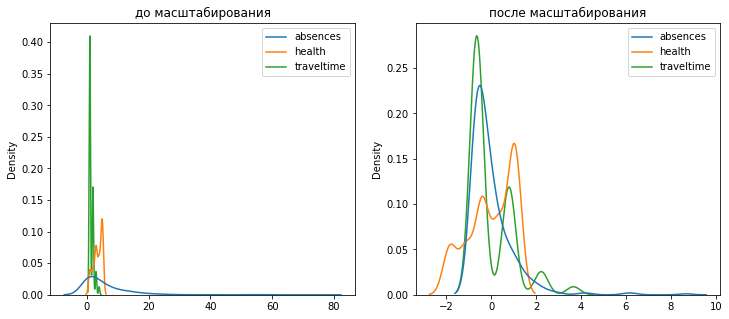

In [ ]:
draw_kde(['absences', 'health', 'traveltime'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [ ]:
# Обучаем StandardScaler на обучающей выборке 
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

In [ ]:
data_cs12_scaled_train.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
count,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02
mean,8.256405e-16,-1.292918e-16,1.215624e-16,-5.902452e-17,-3.583631e-16,-2.680697e-16,-8.994212e-17,1.131303e-16,1.052253e-16,1.356159e-16,1.454533e-16,1.032929e-16,8.159788e-17,2.515569e-16,1.819923e-16
std,1.001586e+00,1.001586e+00,1.001586e+00,1.001586e+00,1.001586e+00,1.001586e+00,1.001586e+00,1.001586e+00,1.001586e+00,1.001586e+00,1.001586e+00,1.001586e+00,1.001586e+00,1.001586e+00,1.001586e+00
min,-1.317917e+00,-2.540727e+00,-2.350224e+00,-6.041612e-01,-1.234095e+00,-4.426643e-01,-3.181302e+00,-2.241131e+00,-1.947051e+00,-5.558010e-01,-1.033867e+00,-1.833330e+00,-6.746582e-01,-2.364933e+00,-2.707403e+00
25%,-5.139367e-01,-7.097813e-01,-5.073684e-01,-6.041612e-01,-1.234095e+00,-4.426643e-01,6.506430e-02,-2.234746e-01,-1.038235e+00,-5.558010e-01,-1.033867e+00,-4.028799e-01,-6.746582e-01,-8.756567e-01,-4.939289e-01
50%,2.900435e-01,2.056917e-01,-4.665457e-02,-6.041612e-01,-4.514981e-02,-4.426643e-01,6.506430e-02,-2.234746e-01,-1.294199e-01,-5.558010e-01,-2.485256e-01,3.123451e-01,-1.887505e-01,1.790902e-02,7.525010e-02
75%,1.094024e+00,1.121165e+00,1.335487e+00,8.644153e-01,-4.514981e-02,-4.426643e-01,1.147186e+00,7.853535e-01,7.793956e-01,5.846737e-01,5.368154e-01,1.027570e+00,2.971572e-01,6.136195e-01,5.811870e-01
max,2.701984e+00,1.121165e+00,1.335487e+00,3.801568e+00,2.332740e+00,3.928646e+00,1.147186e+00,1.794182e+00,1.688211e+00,4.006098e+00,2.107497e+00,1.027570e+00,8.436111e+00,2.400751e+00,2.098998e+00


In [ ]:
data_cs12_scaled_test.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,0.228982,-0.118780,-0.134132,0.269549,-0.015050,0.221332,0.023971,0.070235,-0.152428,-0.036091,-0.099410,-0.031687,0.094183,-0.046186,0.014410
std,1.105756,1.005397,1.006338,1.090876,0.988798,1.356439,0.838979,1.036286,1.049154,1.077276,1.052714,0.970859,0.846038,0.940295,0.722594
min,-1.317917,-2.540727,-2.350224,-0.604161,-1.234095,-0.442664,-2.099180,-2.241131,-1.947051,-0.555801,-1.033867,-1.833330,-0.674658,-1.769223,-1.442560
25%,-0.513937,-0.709781,-0.968082,-0.604161,-0.639622,-0.442664,0.065064,-0.223475,-1.038235,-0.555801,-1.033867,-0.402880,-0.431704,-0.875657,-0.430687
50%,0.290043,0.205692,-0.507368,-0.604161,-0.045150,-0.442664,0.065064,-0.223475,-0.129420,-0.555801,-0.248526,0.312345,-0.188751,0.017909,0.075250
75%,1.094024,1.121165,0.414059,0.864415,-0.045150,-0.442664,0.065064,0.785354,0.779396,0.014436,0.536815,1.027570,0.479373,0.613620,0.328219
max,4.309944,1.121165,1.335487,3.801568,2.332740,3.928646,1.147186,1.794182,1.688211,4.006098,2.107497,1.027570,3.941465,2.102896,1.846029


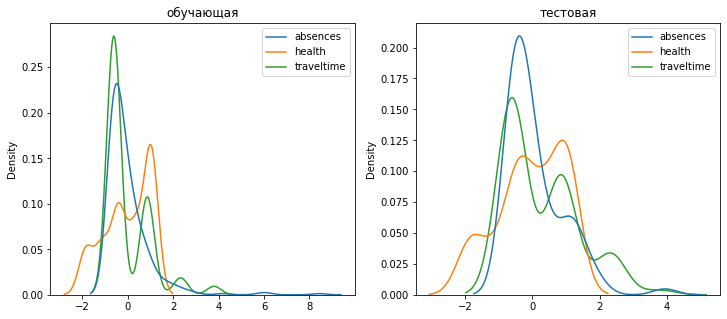

In [ ]:
# распределения для обучающей и тестовой выборки немного отличаются
draw_kde(['absences', 'health', 'traveltime'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

# Масштабирование "Mean Normalisation"

In [ ]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [ ]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.011392,-0.006487,-0.007278,0.012236,-0.000844,0.010127,0.001108,0.003481,-0.008386,-0.001582,-0.006329,-0.002215,0.002068,-0.001938,0.000600
std,0.255209,0.273684,0.272050,0.232502,0.279747,0.247884,0.224165,0.249716,0.278320,0.222685,0.321974,0.347576,0.106708,0.207450,0.197974
min,-0.327848,-0.693829,-0.637658,-0.137131,-0.345992,-0.101266,-0.734968,-0.555380,-0.535601,-0.121835,-0.329114,-0.640823,-0.074051,-0.496242,-0.563291
25%,-0.127848,-0.193829,-0.137658,-0.137131,-0.345992,-0.101266,0.015032,-0.055380,-0.285601,-0.121835,-0.329114,-0.140823,-0.074051,-0.183742,-0.089607
50%,0.072152,0.056171,-0.137658,-0.137131,-0.012658,-0.101266,0.015032,-0.055380,-0.035601,-0.121835,-0.079114,0.109177,-0.020717,0.003758,0.015656
75%,0.272152,0.306171,0.112342,0.196203,-0.012658,-0.101266,0.265032,0.194620,0.214399,0.128165,0.170886,0.359177,0.032616,0.128758,0.120919
max,1.072152,0.306171,0.362342,0.862869,0.654008,0.898734,0.265032,0.444620,0.464399,0.878165,0.670886,0.359177,0.925949,0.503758,0.436709


In [ ]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [ ]:
data_cs22_scaled_train.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
count,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02
mean,2.046535e-16,-3.372829e-17,-1.299945e-17,7.553733e-18,-5.937585e-17,5.085594e-17,-9.837419e-18,-3.162028e-18,-1.124276e-17,1.686415e-17,2.248553e-17,-2.705290e-17,1.745703e-18,4.918710e-17,3.583631e-17
std,2.491569e-01,2.735160e-01,2.717484e-01,2.273372e-01,2.808053e-01,2.291272e-01,2.313940e-01,2.482053e-01,2.755196e-01,2.195546e-01,3.188379e-01,3.500947e-01,1.099343e-01,2.101663e-01,2.083859e-01
min,-3.278481e-01,-6.938291e-01,-6.376582e-01,-1.371308e-01,-3.459916e-01,-1.012658e-01,-7.349684e-01,-5.553797e-01,-5.356013e-01,-1.218354e-01,-3.291139e-01,-6.408228e-01,-7.405063e-02,-4.962421e-01,-5.632911e-01
25%,-1.278481e-01,-1.938291e-01,-1.376582e-01,-1.371308e-01,-3.459916e-01,-1.012658e-01,1.503165e-02,-5.537975e-02,-2.856013e-01,-1.218354e-01,-3.291139e-01,-1.408228e-01,-7.405063e-02,-1.837421e-01,-1.027648e-01
50%,7.215190e-02,5.617089e-02,-1.265823e-02,-1.371308e-01,-1.265823e-02,-1.012658e-01,1.503165e-02,-5.537975e-02,-3.560127e-02,-1.218354e-01,-7.911392e-02,1.091772e-01,-2.071730e-02,3.757911e-03,1.565623e-02
75%,2.721519e-01,3.061709e-01,3.623418e-01,1.962025e-01,-1.265823e-02,-1.012658e-01,2.650316e-01,1.946203e-01,2.143987e-01,1.281646e-01,1.708861e-01,3.591772e-01,3.261603e-02,1.287579e-01,1.209194e-01
max,6.721519e-01,3.061709e-01,3.623418e-01,8.628692e-01,6.540084e-01,8.987342e-01,2.650316e-01,4.446203e-01,4.643987e-01,8.781646e-01,6.708861e-01,3.591772e-01,9.259494e-01,5.037579e-01,4.367089e-01


In [ ]:
data_cs22_scaled_test.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,0.056962,-0.032437,-0.036392,0.061181,-0.004219,0.050633,0.005538,0.017405,-0.041930,-0.007911,-0.031646,-0.011076,0.010338,-0.009691,0.002998
std,0.275070,0.274557,0.273038,0.247604,0.277220,0.310305,0.193827,0.256805,0.288605,0.236147,0.335114,0.339354,0.092861,0.197305,0.150340
min,-0.327848,-0.693829,-0.637658,-0.137131,-0.345992,-0.101266,-0.484968,-0.555380,-0.535601,-0.121835,-0.329114,-0.640823,-0.074051,-0.371242,-0.300133
25%,-0.127848,-0.193829,-0.262658,-0.137131,-0.179325,-0.101266,0.015032,-0.055380,-0.285601,-0.121835,-0.329114,-0.140823,-0.047384,-0.183742,-0.089607
50%,0.072152,0.056171,-0.137658,-0.137131,-0.012658,-0.101266,0.015032,-0.055380,-0.035601,-0.121835,-0.079114,0.109177,-0.020717,0.003758,0.015656
75%,0.272152,0.306171,0.112342,0.196203,-0.012658,-0.101266,0.015032,0.194620,0.214399,0.003165,0.170886,0.359177,0.052616,0.128758,0.068288
max,1.072152,0.306171,0.362342,0.862869,0.654008,0.898734,0.265032,0.444620,0.464399,0.878165,0.670886,0.359177,0.432616,0.441258,0.384077


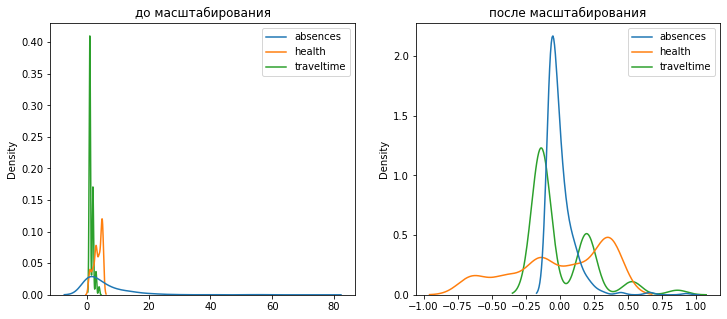

In [ ]:
draw_kde(['absences', 'health', 'traveltime'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

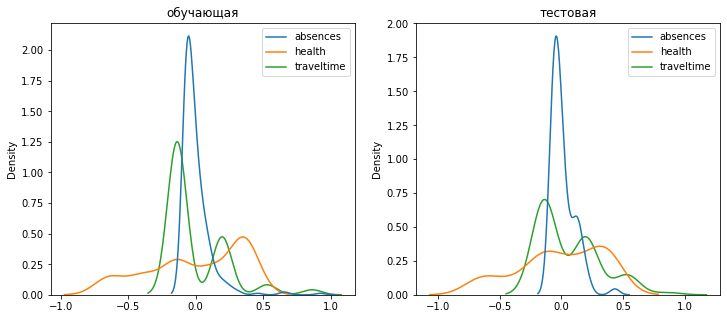

In [ ]:
draw_kde(['absences', 'health', 'traveltime'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

# MinMax-масштабирование

In [ ]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
count,395.000000,395.000000,395.00000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.242315,0.687342,0.63038,0.149367,0.345148,0.111392,0.736076,0.558861,0.527215,0.120253,0.322785,0.638608,0.076118,0.494304,0.563891
std,0.182292,0.273684,0.27205,0.232502,0.279747,0.247884,0.224165,0.249716,0.278320,0.222685,0.321974,0.347576,0.106708,0.207450,0.197974
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.500000,0.50000,0.000000,0.000000,0.000000,0.750000,0.500000,0.250000,0.000000,0.000000,0.500000,0.000000,0.312500,0.473684
50%,0.285714,0.750000,0.50000,0.000000,0.333333,0.000000,0.750000,0.500000,0.500000,0.000000,0.250000,0.750000,0.053333,0.500000,0.578947
75%,0.428571,1.000000,0.75000,0.333333,0.333333,0.000000,1.000000,0.750000,0.750000,0.250000,0.500000,1.000000,0.106667,0.625000,0.684211
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

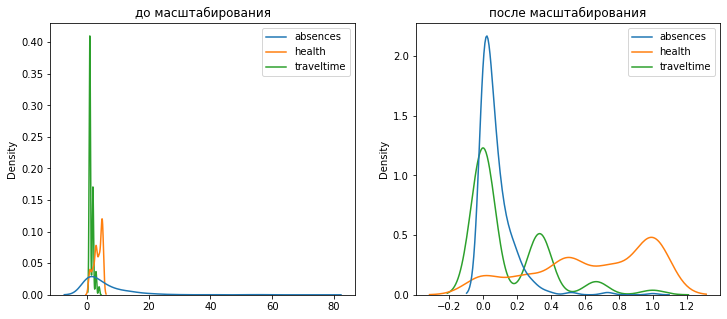

In [ ]:
draw_kde(['absences', 'health', 'traveltime'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

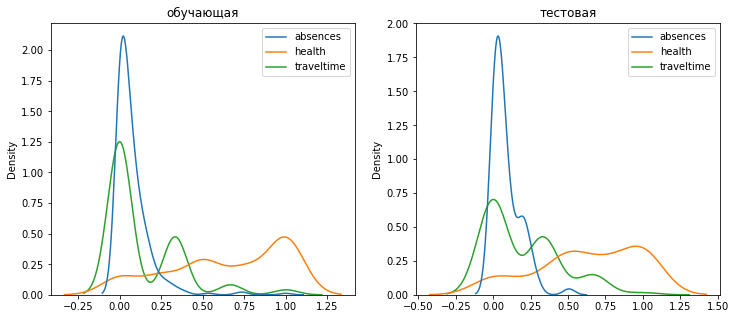

In [ ]:
draw_kde(['absences', 'health', 'traveltime'], data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

# Работа с выбросами

In [ ]:
x_col_list = ['absences','age']

In [ ]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()


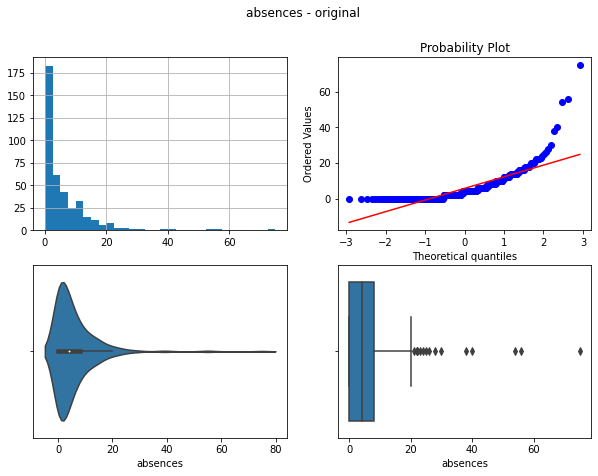

In [ ]:
diagnostic_plots(data, 'absences', 'absences - original')

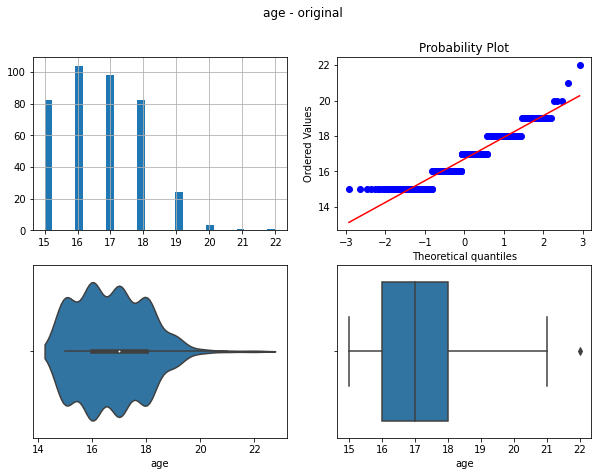

In [ ]:
diagnostic_plots(data, 'age', 'age - original')

In [ ]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [ ]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary 

Удаление выбросов:

In [ ]:
data.shape

(395, 16)

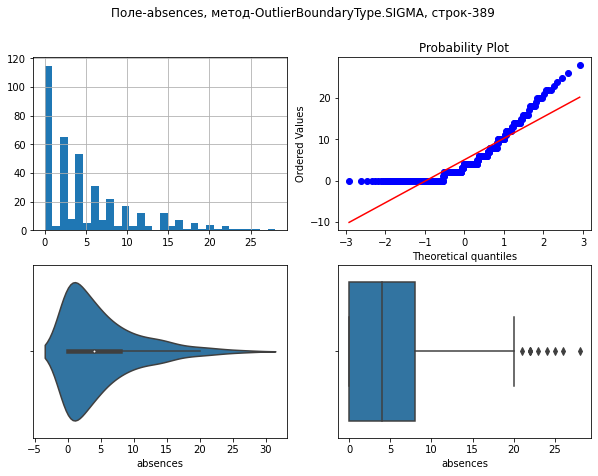

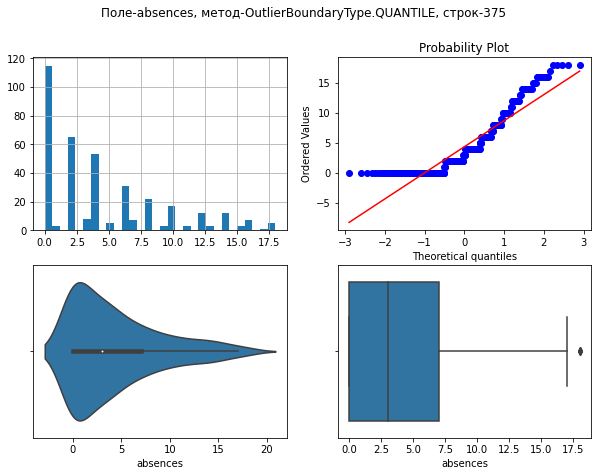

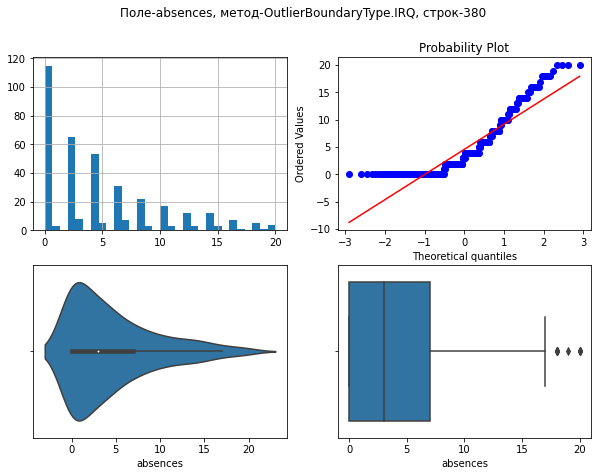

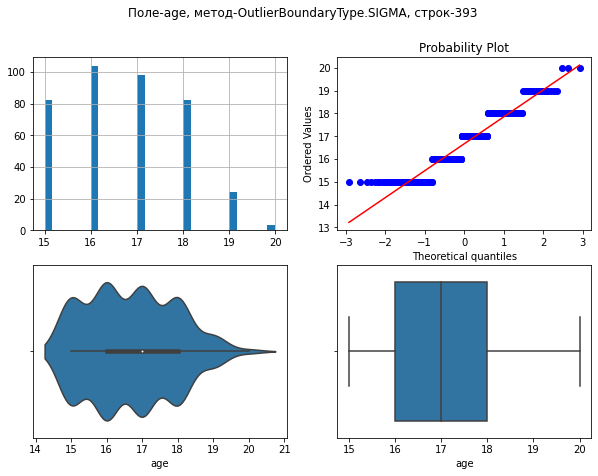

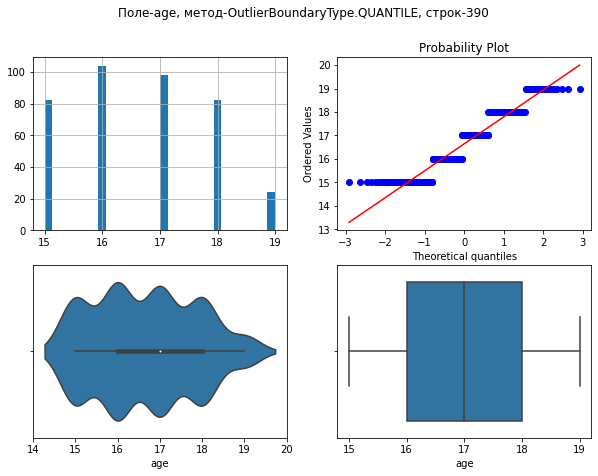

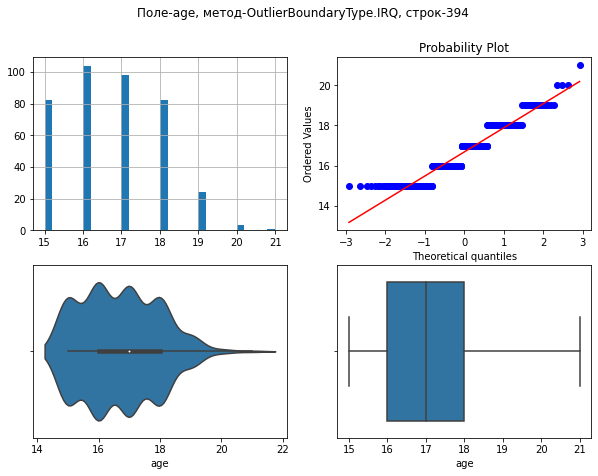

In [ ]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True, 
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

Замена выбросов:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


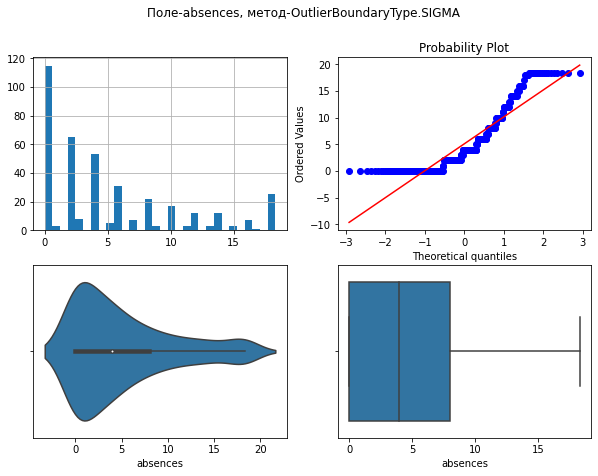

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


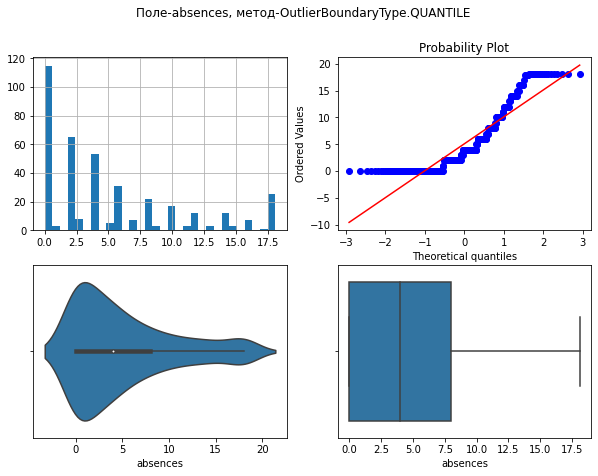

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


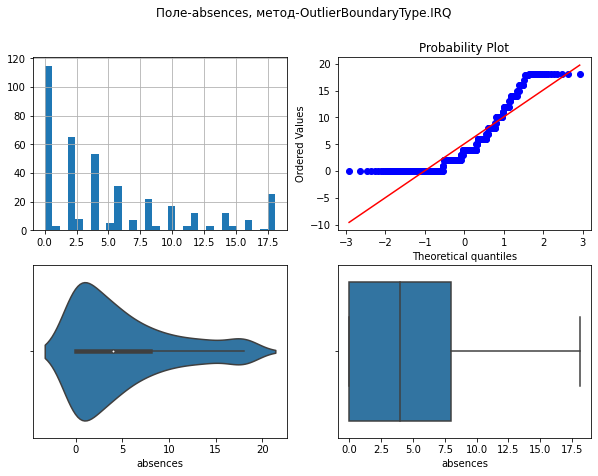

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


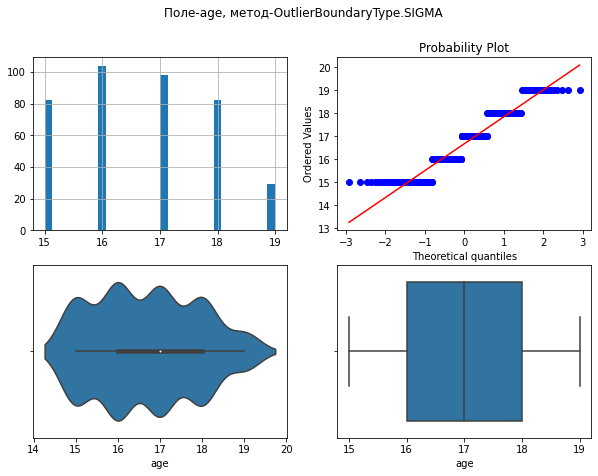

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


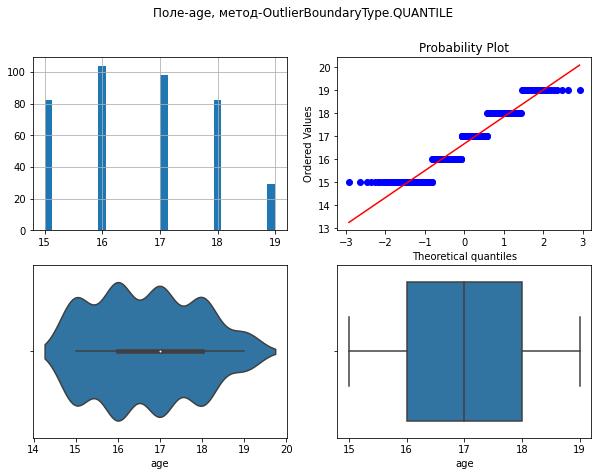

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


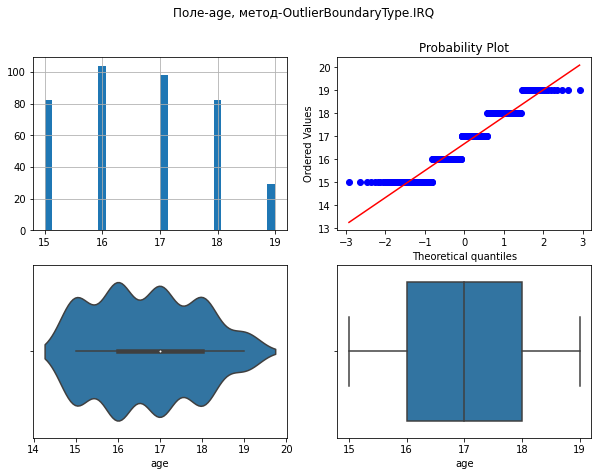

In [ ]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data, col, title)

# Обработка нестандартного признака

In [ ]:
data_for_onp = pd.read_csv(path+'MyDrive/data.csv', index_col=0)
data_for_onp.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
data_for_onp[['Value', 'Wage', 'Release Clause']]

,Value,Wage,Release Clause
0,€110.5M,€565K,€226.5M
1,€77M,€405K,€127.1M
2,€118.5M,€290K,€228.1M
3,€72M,€260K,€138.6M
4,€102M,€355K,€196.4M
...,...,...,...
18202,€60K,€1K,€143K
18203,€60K,€1K,€113K
18204,€60K,€1K,€165K
18205,€60K,€1K,€143K


In [ ]:
for i in ['Value', 'Wage', 'Release Clause']:
    data_for_onp[i] = data_for_onp[i].fillna('€0M')
    data_for_onp[i] = data_for_onp[i].map(lambda x: float(x.replace('.','').replace('€','').replace('M','000000').replace('K','000')))

In [ ]:
data_for_onp[['Value', 'Wage', 'Release Clause']]

,Value,Wage,Release Clause
0,1.105000e+09,565000.0,2.265000e+09
1,7.700000e+07,405000.0,1.271000e+09
2,1.185000e+09,290000.0,2.281000e+09
3,7.200000e+07,260000.0,1.386000e+09
4,1.020000e+08,355000.0,1.964000e+09
...,...,...,...
18202,6.000000e+04,1000.0,1.430000e+05
18203,6.000000e+04,1000.0,1.130000e+05
18204,6.000000e+04,1000.0,1.650000e+05
18205,6.000000e+04,1000.0,1.430000e+05


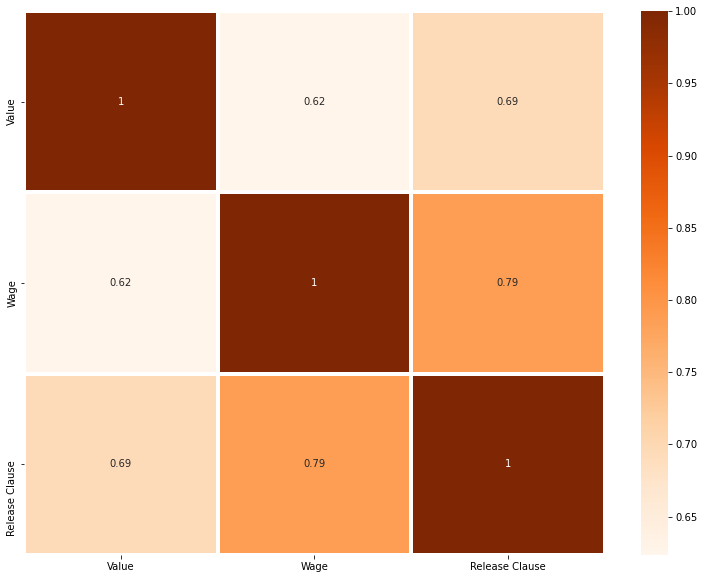

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(data_for_onp[['Value', 'Wage', 'Release Clause']].corr(), cmap="Oranges", annot=True, linewidths=3)

# Отбор признаков

Корреляция признаков (группа методов фильтрации):

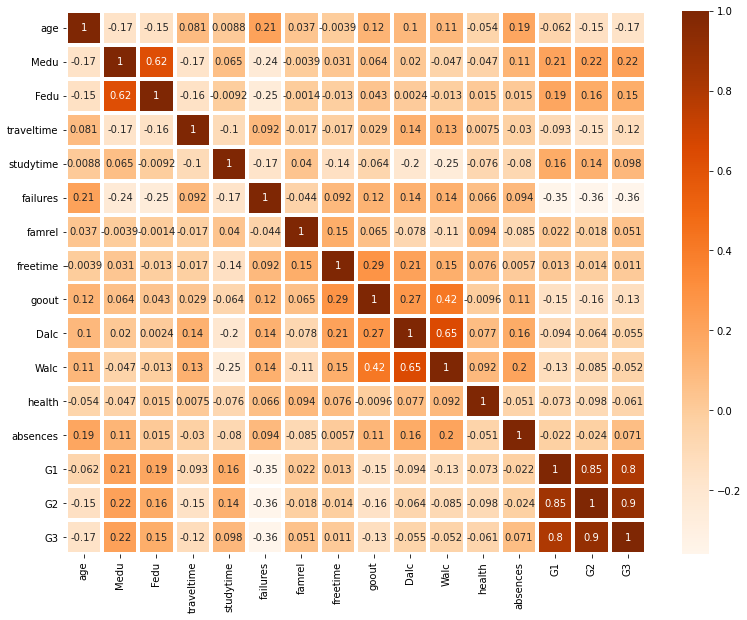

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap="Oranges", annot=True, linewidths=3)

In [ ]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.8]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [ ]:
make_corr_df(data)

,f1,f2,corr
0,G2,G3,0.904868
1,G3,G2,0.904868
2,G2,G1,0.852118
3,G1,G2,0.852118
4,G3,G1,0.801468
5,G1,G3,0.801468


In [ ]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [ ]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data))

[['G3', 'G1', 'G2']]

Алгоритм полного перебора (группа методов обертывания)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X_train, y_train, custom_feature_names=X_ALL.columns)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 1925/1925

Best accuracy score: 0.45
Best subset (indices): (5, 14)
Best subset (corresponding names): ('failures', 'G2')


Логистическая регрессия (группа методов вложения)

In [ ]:
from sklearn.linear_model import LogisticRegression
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(X_train, y_train)
# Коэффициенты регрессии
e_lr1.coef_

array([[ 8.27863401e+00, -4.89570194e+00,  6.19429485e+00,
         1.69254657e+00,  1.23028213e+01,  6.36221816e-01,
        -5.64712919e+00, -2.88011400e+00,  5.79158810e-01,
         8.78756930e+00, -1.70862662e+00, -2.19985490e+00,
        -1.54629574e+01,  1.42672787e-01, -1.02679408e+01],
       [-1.03037773e-01,  2.24095463e+00,  0.00000000e+00,
        -2.82351546e+00,  0.00000000e+00,  4.02484195e+00,
        -1.02648985e+00,  0.00000000e+00,  7.82410371e-01,
         0.00000000e+00,  6.66109097e-01, -4.64491025e+00,
         1.00665736e-01, -9.19634188e-01, -2.07828293e-01],
       [-2.95500420e+00, -1.16090185e+01,  1.11131716e+00,
        -4.42932842e+01,  1.53592290e+01, -7.52875178e+00,
        -5.02828892e+00,  1.11248889e+01,  4.24009666e+00,
         2.85353599e+00,  5.38282147e+00,  8.18243475e+00,
         3.56549849e-01, -7.28867946e+00, -2.26607749e+00],
       [-5.58659583e-01,  1.59850514e-01,  6.81846480e-03,
         6.62901539e-01, -1.01057577e+00, -1.20353452

In [ ]:
from sklearn.feature_selection import SelectFromModel
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(X_train, y_train)
sel_e_lr1.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])